# Proje 1 - Pandas ile Veri Analizi
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __09.06.2021 Çarşamba saat 18:00'e kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz. 
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* DataFrame'in gerekli sütunlarını elde edebilmek için (örn: anketteki 7. soru ile ilgili tüm sütunlar) "```filter```" metodunu kullanmanız önerilir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [1]:
import pandas as pd
import numpy as np

survey = pd.read_csv("kaggle_survey_2020_responses.csv",skiprows=[1])
survey = survey.iloc[: , 1:]
count = survey.shape[0]
dict1 = {'Q1': 'Age','Q2': 'Gender','Q3': 'Country','Q4': 'Education','Q5': 'Occupation','Q6': 'Coding Experience'}
survey.rename(columns=dict1,inplace=True)
survey.dropna(subset=["Education","Occupation","Coding Experience"],inplace=True)
countrow_deleted = survey.shape[0]
countcolumn = survey.shape[1]
print("Silinen satır sayısı: "+ str(count - countrow_deleted))
print("Satır sayısı: "+ str(countrow_deleted))
print("Sütun sayısı: "+ str(countcolumn))

Silinen satır sayısı: 916
Satır sayısı: 19120
Sütun sayısı: 354


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

C:\Users\arif_\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='Age'>

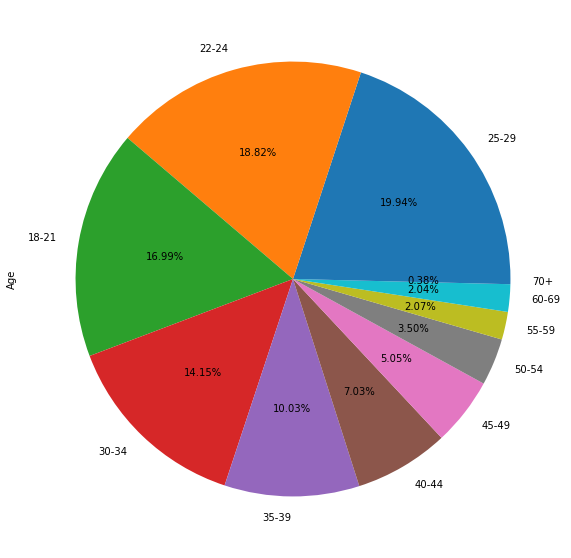

In [2]:
import matplotlib.pyplot as plt
ages = survey['Age'].value_counts(normalize=True)
ages.plot.pie(autopct='%1.2f%%',figsize=(10,10))

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [3]:
survey[survey['Country'] == 'Turkey']['Education'].value_counts()

Bachelor’s degree                                                    129
Master’s degree                                                      111
Doctoral degree                                                       50
Some college/university study without earning a bachelor’s degree     15
I prefer not to answer                                                 8
Professional degree                                                    6
No formal education past high school                                   3
Name: Education, dtype: int64

## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [4]:
survey.groupby(survey['Age']).apply(lambda x:x['Occupation'].value_counts().idxmax())

Age
18-21           Student
22-24           Student
25-29           Student
30-34    Data Scientist
35-39    Data Scientist
40-44    Data Scientist
45-49             Other
50-54             Other
55-59             Other
60-69             Other
70+      Data Scientist
dtype: object

## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

Kullanıcı Bazlı Dil Kullanımı
[('Python', 15530), ('SQL', 7535), ('R', 4277), ('C++', 3827), ('Java', 3367), ('C', 3315), ('Javascript', 2995), ('MATLAB', 2217), ('Bash', 1776), ('Julia', 262), ('Swift', 198)]
Data Scientist Kullanıcı Bazlı Dil Kullanımı
[('Python', 2453), ('SQL', 1473), ('R', 975), ('Bash', 405), ('C++', 323), ('Java', 305), ('Javascript', 290), ('C', 247), ('MATLAB', 242), ('Julia', 71), ('Swift', 14)]


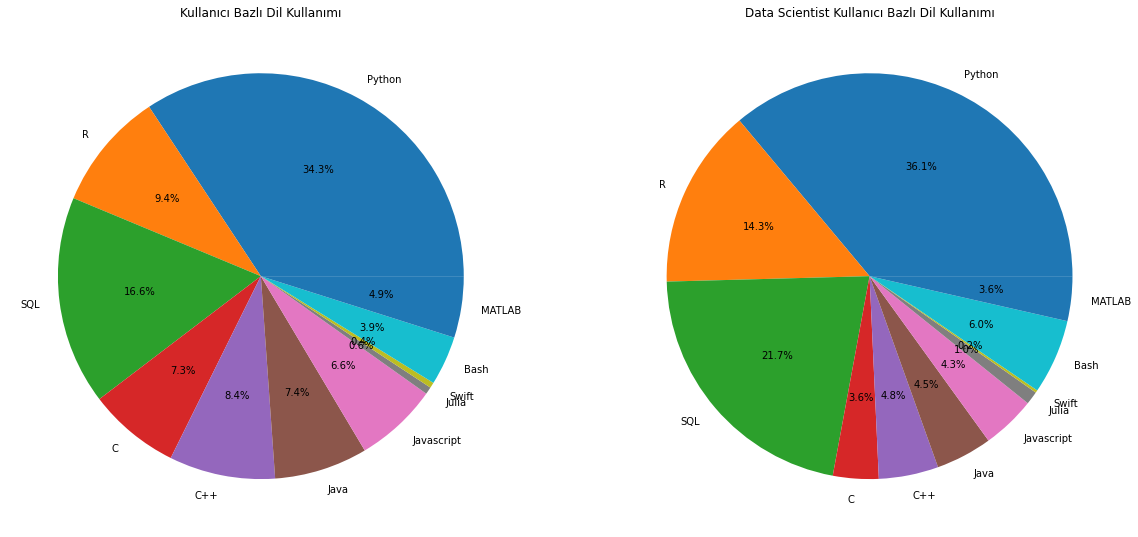

In [5]:
prog_lang = ['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB']
index = survey.columns.get_loc('Q7_Part_1')
datas1 = survey[survey.columns[index:index+11]].count().values
datas2 = survey[survey['Occupation'] == 'Data Scientist'][survey.columns[index:index+11]].count().values

users1 = dict(zip(prog_lang, datas1))
users2 = dict(zip(prog_lang, datas2))

print("Kullanıcı Bazlı Dil Kullanımı")
print(sorted(users1.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))
print("Data Scientist Kullanıcı Bazlı Dil Kullanımı")
print(sorted(users2.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) 
ax1.pie(datas1,labels = prog_lang, autopct = '%1.1f%%')
ax1.set_title('Kullanıcı Bazlı Dil Kullanımı')
ax2.pie(datas2,labels = prog_lang, autopct = '%1.1f%%') 
ax2.set_title('Data Scientist Kullanıcı Bazlı Dil Kullanımı')
plt.show()

## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

<AxesSubplot:>

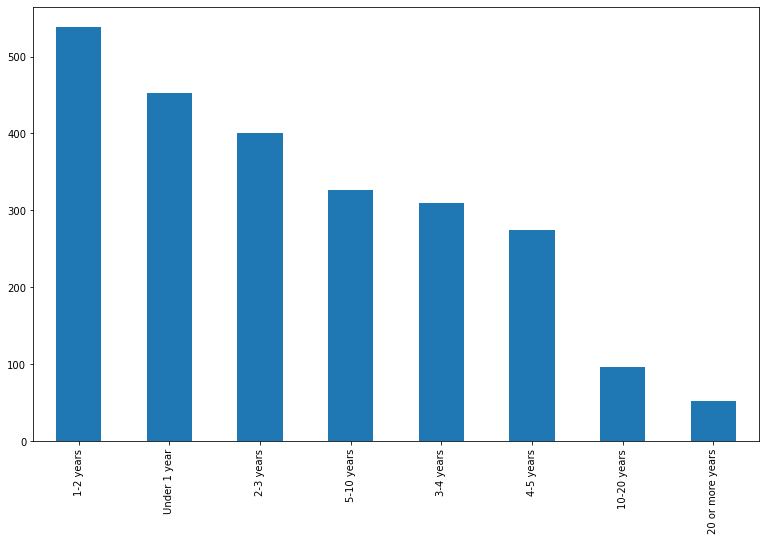

In [6]:
survey_6 = survey[(survey['Occupation'] == 'Data Scientist') & (survey['Q15'] != 'I do not use machine learning methods')]
list = survey_6['Q15'].value_counts()
list.plot(kind='bar',figsize=(13,8))

## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [7]:
methods = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 
                   'Gradient Boosting Machines (xgboost, lightgbm, etc)', 'Bayesian Approaches', 'Evolutionary Approaches', 
                   'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks', 'Generative Adversarial Networks', 
                   'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)']

index1 = survey.columns.get_loc('Q16_Part_2')
survey_scikit = survey[(survey['Q16_Part_1'] == '  Scikit-learn ') & (survey[survey.columns[index1:index1+15]].isnull().all(axis=1))]
index = survey_scikit.columns.get_loc('Q17_Part_1')
values = survey_scikit[survey_scikit.columns[index:index+10]].count().values
methods_users = dict(zip(methods, values))
print(sorted(methods_users.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

print("\nScikit-learn : " + str(survey[survey['Q16_Part_1'] == '  Scikit-learn ']['Q16_Part_1'].count()))
print("TensorFlow : " + str(survey[survey['Q16_Part_2'] == '  TensorFlow ']['Q16_Part_2'].count()))
print("Keras : " + str(survey[survey['Q16_Part_3'] == ' Keras ']['Q16_Part_3'].count()))
print("Üçünü ortak kullanan : "+str(survey[(survey['Q16_Part_1'] == '  Scikit-learn ') & 
                                             (survey['Q16_Part_2'] == '  TensorFlow ') & 
                                             (survey['Q16_Part_3'] == ' Keras ')].shape[0]))


[('Linear or Logistic Regression', 1683), ('Decision Trees or Random Forests', 1292), ('Bayesian Approaches', 428), ('Gradient Boosting Machines (xgboost, lightgbm, etc)', 295), ('Convolutional Neural Networks', 138), ('Dense Neural Networks (MLPs, etc)', 68), ('Recurrent Neural Networks', 67), ('Evolutionary Approaches', 38), ('Transformer Networks (BERT, gpt-3, etc)', 20), ('Generative Adversarial Networks', 8)]

Scikit-learn : 10250
TensorFlow : 6934
Keras : 6192
Üçünü ortak kullanan : 4406


## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [17]:
araliklar = {'100,000-124,999' : 112499, '15,000-19,999' : 17499, '125,000-149,999' : 137499,
       '70,000-79,999' : 74999, '30,000-39,999': 34999, '90,000-99,999' : 94999, '1,000-1,999' : 1499,
       '$0-999' : 499, '10,000-14,999' : 12499, '150,000-199,999' : 174999, '60,000-69,999' : 64999,
       '4,000-4,999' : 4499, '> $500,000' : 500000, '300,000-500,000' : 400000, '40,000-49,999' : 44999,
       '25,000-29,999' : 27499, '80,000-89,999' : 84999, '7,500-9,999' : 8749, '50,000-59,999' : 54999,
       '250,000-299,999' : 274999, '5,000-7,499' : 6249, '2,000-2,999' : 2499, '20,000-24,999' : 22499,
       '200,000-249,999' : 224999, '3,000-3,999' : 3499}        

survey['ConvertedComp'] = survey['Q24'].map(araliklar)
#1.soru
sonuc1 = survey.groupby(['Occupation']).mean().sort_values('ConvertedComp',ascending=False)
print("Ortalama yıllık maaşı en yüksek olan meslek : "+ sonuc1.index[0]) 
print("Data Scientist " + str((sonuc1.index.get_loc('Data Scientist'))+1)+". sıradadır.")

#2.soru
survey_datasci = survey[survey['Occupation'] == 'Data Scientist']
list = survey_datasci.groupby(['Country']).mean().sort_values('ConvertedComp',ascending=False)
list.columns = ['Average']
print(list[:10])

#3.soru
survey_more250 = survey[(survey['Q20'] != '0-49 employees') &  (survey['Q20'] != '50-249 employees')]
print("250’den fazla kişi çalışan kurumdakilerin ortalama maaşları : "+str(survey_more250.mean()[0]))

#4.soru
list1 = survey[['Country','ConvertedComp']].groupby(['Country']).mean()
list2 = survey[['Country','ConvertedComp']].groupby(['Country']).std()
list3 = survey[['Country','ConvertedComp']].groupby(['Country']).median()
ndf = pd.DataFrame(list1)
ndf = ndf.rename(columns={'ConvertedComp': 'Average'})
ndf['StandartDev'] = list2
ndf['Median'] = list3
ndf.sort_values(by=['Average'], inplace=True,ascending=False)
ndf.reset_index(inplace=True)

print("\nTürkiye tüm ülkeler arasında ortalama maaş için "+str(ndf[ndf['Country'] == 'Turkey'].index[0]+1)+". sıradadır.")
print("Ortalama Maaş Değeri : "+str((ndf[ndf['Country'] == 'Turkey']).Average.values[0]))
print("Standart Sapma Değeri : "+str((ndf[ndf['Country'] == 'Turkey']).StandartDev.values[0]))
print("Median Değeri : "+str((ndf[ndf['Country'] == 'Turkey']).Median.values[0]))
print(ndf)

Ortalama yıllık maaşı en yüksek olan meslek : Product/Project Manager
Data Scientist 2. sıradadır.
                                                          Average
Country                                                          
United States of America                            142608.853591
Israel                                              111979.040000
Switzerland                                         109229.769231
Australia                                           104318.472222
United Kingdom of Great Britain and Northern Ir...   89749.009174
Germany                                              79803.703125
Ireland                                              78499.000000
Singapore                                            76936.500000
Canada                                               74465.981132
Thailand                                             73707.416667
250’den fazla kişi çalışan kurumdakilerin ortalama maaşları : 56410.335490009515

Türkiye tüm ülkeler arasınd

## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

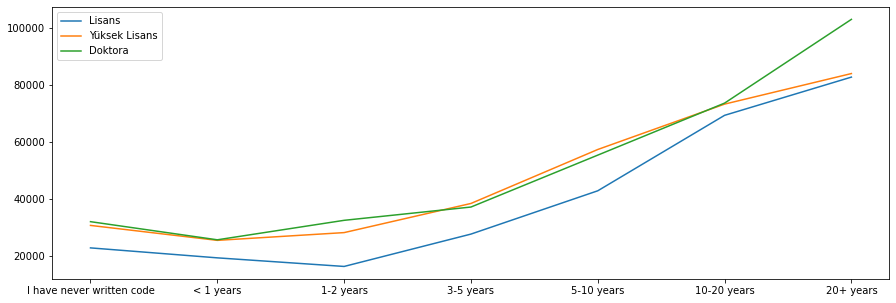

In [19]:
experiences = ['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years','20+ years']
survey_lisans = survey[survey['Education'] == 'Bachelor’s degree'].groupby('Coding Experience').mean()
survey_yuksek = survey[survey['Education'] == 'Master’s degree'].groupby('Coding Experience').mean()
survey_doktor = survey[survey['Education'] == 'Doctoral degree'].groupby('Coding Experience').mean()

survey_lisans = survey_lisans.reindex(experiences)
survey_yuksek = survey_yuksek.reindex(experiences)
survey_doktor = survey_doktor.reindex(experiences)

fig = plt.figure(figsize=(15,5))
plt.plot(survey_lisans)
plt.plot(survey_yuksek)
plt.plot(survey_doktor)
plt.legend(['Lisans', 'Yüksek Lisans','Doktora'])
plt.show()

## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

Kadınların mesleklere göre yüzdesi:
                               Wrate
Occupations                         
Student                    24.029647
Statistician               23.693380
Data Analyst               23.541524
Currently not employed     22.674772
Research Scientist         20.308483
Business Analyst           19.338422
Other                      16.802326
Data Scientist             16.434750
Data Engineer              13.888889
Software Engineer          13.272078
DBA/Database Engineer      12.800000
Machine Learning Engineer  12.616822
Product/Project Manager    11.370262

Çalışmayan Kadın Oranı : 10.13586956521739
Çalışmayan Erkek Oranı : 8.15285780515266


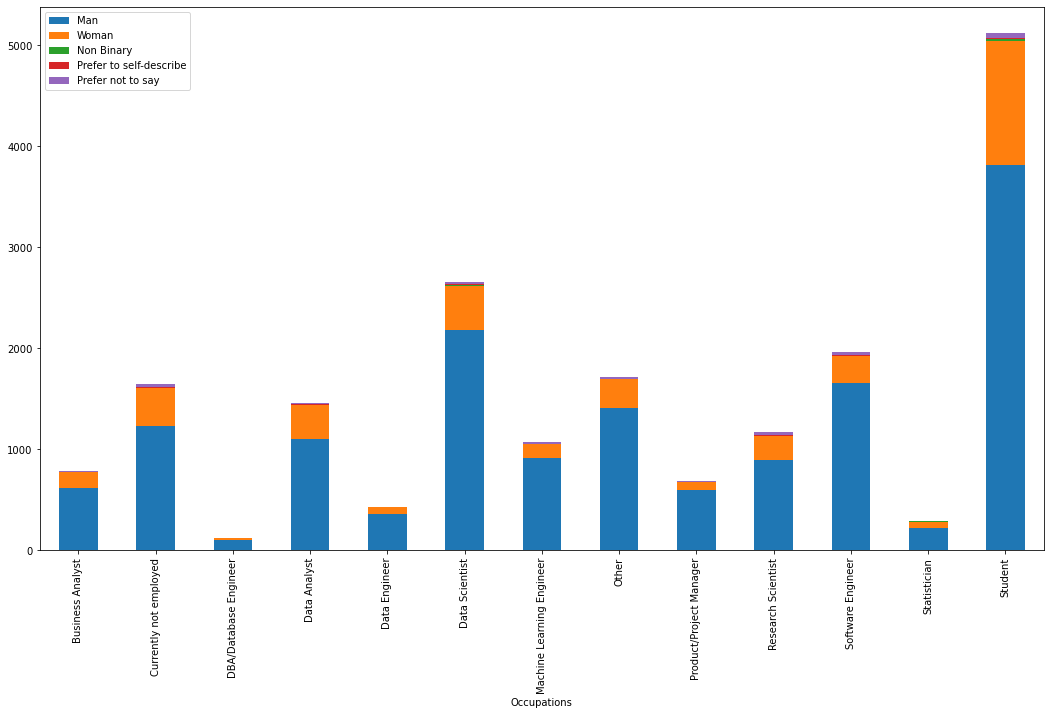

In [10]:
man = survey.loc[survey['Gender'] == 'Man', 'Occupation'].value_counts().reindex(survey['Occupation'].unique(), fill_value=0)
woman = survey.loc[survey['Gender'] == 'Woman', 'Occupation'].value_counts().reindex(survey['Occupation'].unique(), fill_value=0)
nonbinary = survey.loc[survey['Gender'] == 'Nonbinary', 'Occupation'].value_counts().reindex(survey['Occupation'].unique(), fill_value=0)
selfdes = survey.loc[survey['Gender'] == 'Prefer to self-describe', 'Occupation'].value_counts().reindex(survey['Occupation'].unique(), fill_value=0)
notsay = survey.loc[survey['Gender'] == 'Prefer not to say', 'Occupation'].value_counts().reindex(survey['Occupation'].unique(), fill_value=0)
labels = (survey['Occupation'].value_counts()).keys().to_list()

man = man.sort_index().values
woman = woman.sort_index().values
nonbinary = nonbinary.sort_index().values
selfdes = selfdes.sort_index().values
notsay = notsay.sort_index().values
labels.sort()

genders = pd.DataFrame()
genders['Occupations'] = labels
genders['Man'] = man
genders['Woman'] = woman
genders['Non Binary'] = nonbinary
genders['Prefer to self-describe'] = selfdes
genders['Prefer not to say'] = notsay

genders.set_index('Occupations',inplace=True)
genders.plot(kind='bar',stacked=True,figsize=(18,10))
genders['Wrate'] = (genders['Woman'] / (genders['Woman'] + genders['Man'] + 
                                        genders['Non Binary'] + genders['Prefer to self-describe'] + 
                                        genders['Prefer not to say']))*100

print("Kadınların mesleklere göre yüzdesi:")
print(genders[['Wrate']].sort_values(by='Wrate',ascending=False))

notEmpWom = survey[survey['Gender'] == 'Woman']['Occupation'].value_counts(normalize=True)['Currently not employed']
notEmpMan = survey[survey['Gender'] == 'Man']['Occupation'].value_counts(normalize=True)['Currently not employed']

print("\nÇalışmayan Kadın Oranı : " + str(notEmpWom*100))
print("Çalışmayan Erkek Oranı : " + str(notEmpMan*100))

## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

En Yüksek Katılımcı Olan Ülke 480 katılımcı ile India


<AxesSubplot:ylabel='Education'>

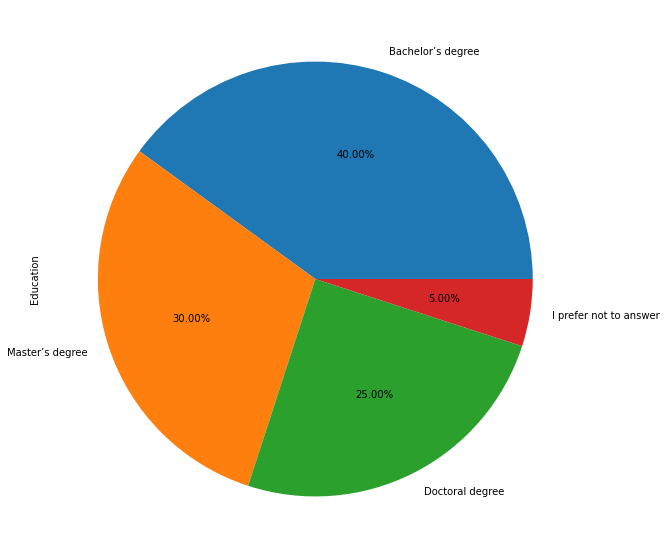

In [11]:
surveywom = survey[(survey['Gender'] == 'Woman') & ((survey['Coding Experience'] != '< 1 years')
                                                   & (survey['Coding Experience'] != '1-2 years')
                                                    &(survey['Coding Experience'] != 'I have never written code'))]
list = surveywom['Country'].value_counts()
enyuksek = list.keys()[0]
print("En Yüksek Katılımcı Olan Ülke "+str(list[0])+" katılımcı ile "+enyuksek)

surveywomtr = surveywom[surveywom['Country'] == 'Turkey']
list = surveywomtr['Education'].value_counts(normalize=True)
list.plot(kind = 'pie', autopct='%1.2f%%',figsize=(10, 10))

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [12]:
index = survey.columns.get_loc('Q39_Part_1')
survey[survey.columns[index:index+10]] = survey[survey.columns[index:index+10]].replace(r" \(.*\)","",regex=True)
column = (survey[survey['Age'] == '18-21']).iloc[:,index:index+10].count().idxmax()
print("18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu : "+ str(survey[column].unique()[0]))

18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu : Kaggle


## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [13]:
country_info = pd.read_csv("countryInfo.txt", skiprows=range(49), delimiter = "\t", usecols = ['#ISO','Country','neighbours'],index_col='Country')
country_info.rename(columns={"#ISO": "Country Code"},inplace = True)
merged_survey = pd.merge(survey, country_info, left_on = 'Country', right_index=True, how = 'left')
merged_survey.head()

,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp,Country Code,neighbours
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO,"EC,PE,PA,BR,VE"
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112499.0,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,17499.0,AR,"CL,BO,UY,PY,BR"
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137499.0,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JP,NaN


## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [14]:
komsular = merged_survey[merged_survey['Country'] == 'Germany'].neighbours.values[0]
komsular = komsular.split(",")
komsular.append('DE')
komsu = merged_survey[merged_survey['Country Code'].isin(komsular)]
result1 = komsu.groupby('Country').apply(lambda x:x['Education'].value_counts(normalize=True)['Doctoral degree'])
print("Yüzdeler")
print(result1*100)

Yüzdeler
Country
Belgium        22.033898
France         23.961661
Germany        25.848564
Netherlands    15.436242
Poland         15.172414
Switzerland    32.352941
dtype: float64
